## Visualizing Historical Sea Ice and Climate Trends in the Southern Ocean

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas
import folium

In [20]:
climate_df = pd.read_csv("A historical Southern Ocean climate dataset from whaling ships' logbooks.csv")
print(climate_df.head())

     YR  MO  DY  HR    LAT    LON  IM  ATTC  TI  LI  ...  SIM  LOV  DOS  HOP  \
0  1933  10  29  12 -54.17 -36.37   1     1   0   2  ...    C  397  NaN  NaN   
1  1933  10  30  12 -54.55 -30.55   1     1   0   2  ...    C  397  NaN  NaN   
2  1933  10  31  12 -55.00 -26.12   1     1   0   2  ...    C  397  NaN  NaN   
3  1933  11   1  12 -55.62 -21.63   1     1   0   2  ...    C  397  NaN  NaN   
4  1933  11   2  12 -56.00 -19.10   1     1   0   2  ...    C  397  NaN  NaN   

   HOT  HOB  HOA  SMF  SME  SMV  
0  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 71 columns]


C:\Users\dangv\AppData\Local\Temp\ipykernel_20144\2474855665.py:1: DtypeWarning:

Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.



In [36]:
# Create a datetime datatype column
climate_df['date'] = pd.to_datetime(
    climate_df[['YR', 'MO', 'DY']].rename(columns={'YR': 'year', 'MO': 'month', 'DY': 'day'}),
    errors='coerce'
)
climate_df = climate_df.sort_values('date')
clean_climate_df = climate_df.dropna(subset='SST')
clean_climate_df['SST'].describe()



count    8254.000000
mean        0.049538
std         3.154818
min       -10.000000
25%        -1.110000
50%         0.000000
75%         0.560000
max        28.890000
Name: SST, dtype: float64

C:\Users\dangv\AppData\Local\Temp\ipykernel_20144\38280125.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dangv\AppData\Local\Temp\ipykernel_20144\38280125.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



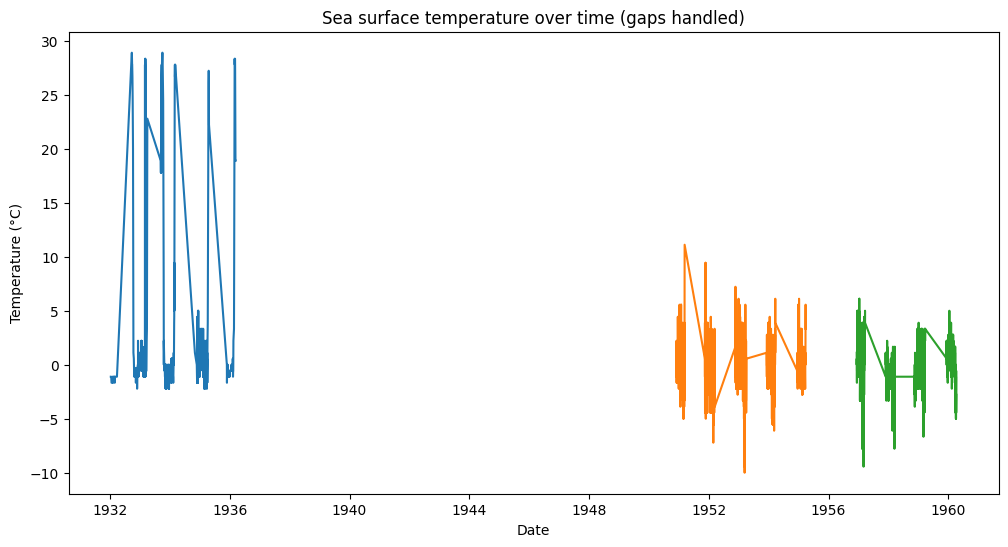

In [38]:
# Calculate time difference between rows
clean_climate_df['date_diff'] = clean_climate_df['date'].diff()

# Mask rows where the gap is large (e.g., more than 1 year)
gap_threshold = pd.Timedelta(days=365)
clean_climate_df['group'] = (clean_climate_df['date_diff'] > gap_threshold).cumsum()

# Plot line by group to avoid connecting across gaps
plt.figure(figsize=(12,6))
for _, group_df in clean_climate_df.groupby('group'):
    plt.plot(group_df['date'], group_df['SST'], label=None)
    
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Sea surface temperature over time (gaps handled)")
plt.show()
